**EMBEDDING USING FASTTEXT**

In [ ]:
!pip install fasttext gensim


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 1.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-2.13.6-py3-none-any.whl.metadata (9.5 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 53.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 63.0 MB/s eta 0:00:00
Using cached pybind11-2.13.6-py3-none-any.whl (243 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 17.5 MB/s eta 0:00:00
  Created wheel for fasttext: filename=fasttext-0.9.3-cp311-cp311-linux_x86_64.whl size=4313503 sha256=fe0ffaa296625e1b6003e3a907dd641b3173caa1eaf5d2159741000fde6da8d5
  Stored in directory: /root/.cache/pip/wheels/65/4f/35/5057db0249224e9ab55a513fa6b79451473ceb77130

In [ ]:
!pip install pandas

In [ ]:
!pip install --upgrade --force-reinstall numpy
!pip install --upgrade --force-reinstall pandas
!pip install --upgrade --force-reinstall fasttext


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 91.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.5 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.5 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.5 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 2.2 MB/s eta 0:00:00
  Using cached numpy-2.2.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 

  Using cached fasttext-0.9.3-cp311-cp311-linux_x86_64.whl
  Using cached pybind11-2.13.6-py3-none-any.whl.metadata (9.5 kB)
  Using cached setuptools-79.0.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached numpy-2.2.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached pybind11-2.13.6-py3-none-any.whl (243 kB)
Using cached setuptools-79.0.0-py3-none-any.whl (1.3 MB)
Using cached numpy-2.2.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.4 MB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 75.2.0
    Uninstalling setuptools-75.2.0:
      Successfully uninstalled setuptools-75.2.0
  Attempting uninstall: pybind11
    Found existing installation: pybind11 2.13.6
    Uninstalling pybind11-2.13.6:
      Successfully uninstalled pybind11-2.13.6
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.5
    Uninstalling numpy-2.2.5:
      Successfully uninstalled numpy-2.2.5
  Attempting uni

In [ ]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.ml.300.bin.gz
!gunzip cc.ml.300.bin.gz

import fasttext
import numpy as np
import pandas as pd

model = fasttext.load_model('cc.ml.300.bin')

# Load your dataset
df = pd.read_excel("/content/Malayalam_Reviews_1500Fake_1400Real.xlsx")
reviews = df['Review'].astype(str).tolist()
labels = df['Label'].astype(int).tolist()

# Generate FastText embeddings
def get_ft_embedding(text):
    vectors = [model.get_word_vector(w) for w in text.split()]
    return np.mean(vectors, axis=0) if vectors else np.zeros(300)

embeddings = [get_ft_embedding(text) for text in reviews]

# Save as CSV
embed_df = pd.DataFrame(embeddings)
embed_df['Label'] = labels
embed_df.to_csv("FastText_Malayalam_Embeddings.csv", index=False)


--2025-04-22 01:09:50--  https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.ml.300.bin.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 18.173.166.31, 18.173.166.51, 18.173.166.48, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|18.173.166.31|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4514187541 (4.2G) [application/octet-stream]
Saving to: ‘cc.ml.300.bin.gz.1’

cc.ml.300.bin.gz.1  100%[===================>]   4.20G  30.0MB/s    in 52s     

2025-04-22 01:10:42 (82.9 MB/s) - ‘cc.ml.300.bin.gz.1’ saved [4514187541/4514187541]



Random Forest

🌲 Random Forest
Train Accuracy: 0.8913793103448275
Test Accuracy: 0.5172413793103449
Train F1 Score: 0.8956953642384106
Test F1 Score: 0.5512820512820513


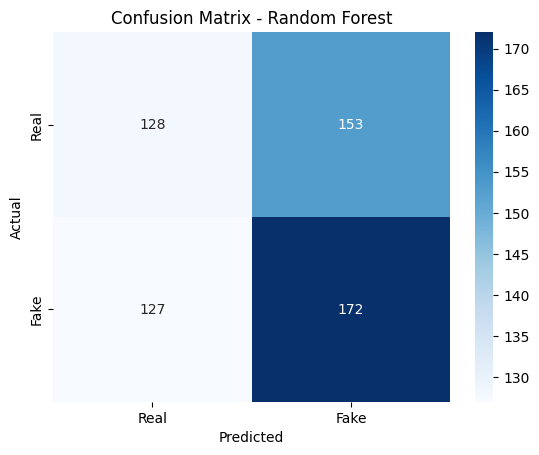

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# Load your dataset
df = pd.read_csv("/content/FastText_Malayalam_Embeddings.csv")  # update path if needed
X = df.drop(columns=["Label"])
y = df["Label"].astype(int)

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Confusion matrix helper
def show_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Real", "Fake"], yticklabels=["Real", "Fake"])
    plt.title(f"Confusion Matrix - {title}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("🌲 Random Forest")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Train F1 Score:", f1_score(y_train, y_train_pred))
print("Test F1 Score:", f1_score(y_test, y_test_pred))

show_confusion_matrix(y_test, y_test_pred, "Random Forest")



Naive Bayes

📊 Naive Bayes
Train Accuracy: 0.5629310344827586
Test Accuracy: 0.5155172413793103
Train F1 Score: 0.4945164506480558
Test F1 Score: 0.42061855670103093


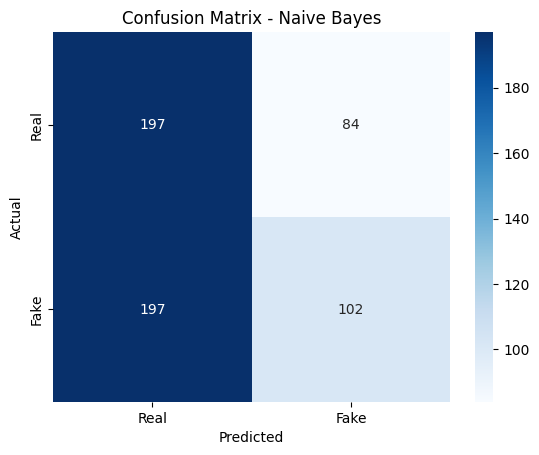

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
# Load your dataset
df = pd.read_csv("/content/FastText_Malayalam_Embeddings.csv")  # update path if needed
X = df.drop(columns=["Label"])
y = df["Label"].astype(int)

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Confusion matrix helper
def show_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Real", "Fake"], yticklabels=["Real", "Fake"])
    plt.title(f"Confusion Matrix - {title}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


model = GaussianNB()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("📊 Naive Bayes")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Train F1 Score:", f1_score(y_train, y_train_pred))
print("Test F1 Score:", f1_score(y_test, y_test_pred))

show_confusion_matrix(y_test, y_test_pred, "Naive Bayes")


XGboost

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [01:28:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


⚡ XGBoost
Train Accuracy: 0.8913793103448275
Test Accuracy: 0.5293103448275862
Train F1 Score: 0.893491124260355
Test F1 Score: 0.5442404006677797


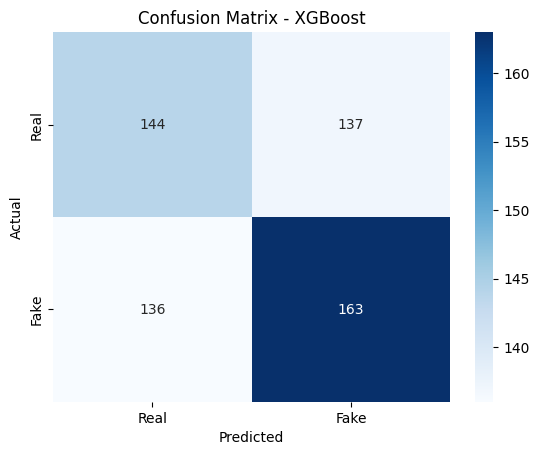

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from xgboost import XGBClassifier
# Load your dataset
df = pd.read_csv("/content/FastText_Malayalam_Embeddings.csv")  # update path if needed
X = df.drop(columns=["Label"])
y = df["Label"].astype(int)

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Confusion matrix helper
def show_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Real", "Fake"], yticklabels=["Real", "Fake"])
    plt.title(f"Confusion Matrix - {title}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("⚡ XGBoost")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Train F1 Score:", f1_score(y_train, y_train_pred))
print("Test F1 Score:", f1_score(y_test, y_test_pred))

show_confusion_matrix(y_test, y_test_pred, "XGBoost")


MLP

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


🧠 MLP Neural Net
Train Accuracy: 0.7918103448275862
Test Accuracy: 0.4827586206896552
Train F1 Score: 0.8048484848484848
Test F1 Score: 0.4791666666666667


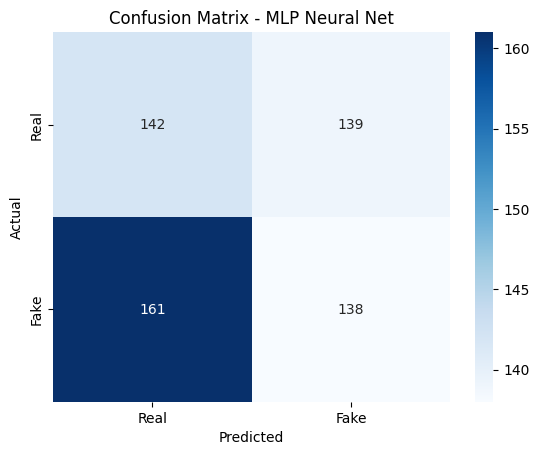

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.neural_network import MLPClassifier
# Load your dataset
df = pd.read_csv("/content/FastText_Malayalam_Embeddings.csv")  # update path if needed
X = df.drop(columns=["Label"])
y = df["Label"].astype(int)

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Confusion matrix helper
def show_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Real", "Fake"], yticklabels=["Real", "Fake"])
    plt.title(f"Confusion Matrix - {title}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


model = MLPClassifier(hidden_layer_sizes=(128,), max_iter=300, random_state=42)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("🧠 MLP Neural Net")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Train F1 Score:", f1_score(y_train, y_train_pred))
print("Test F1 Score:", f1_score(y_test, y_test_pred))

show_confusion_matrix(y_test, y_test_pred, "MLP Neural Net")


adaboost

🚀 AdaBoost
Train Accuracy: 0.6125
Test Accuracy: 0.5379310344827586
Train F1 Score: 0.6341066341066341
Test F1 Score: 0.5620915032679739


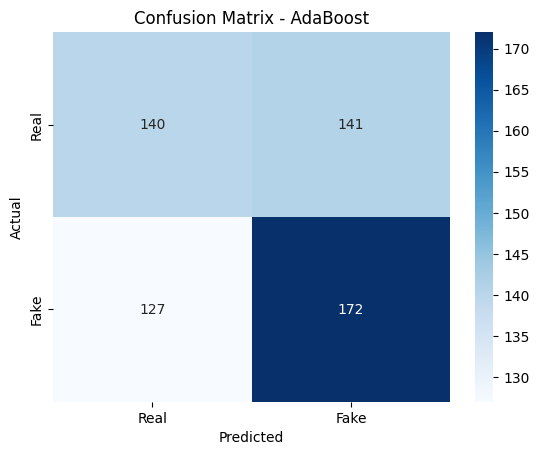

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.ensemble import AdaBoostClassifier

# Load your dataset
df = pd.read_csv("/content/FastText_Malayalam_Embeddings.csv")  # update path if needed
X = df.drop(columns=["Label"])
y = df["Label"].astype(int)

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Confusion matrix helper
def show_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Real", "Fake"], yticklabels=["Real", "Fake"])
    plt.title(f"Confusion Matrix - {title}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

model = AdaBoostClassifier(random_state=42)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("🚀 AdaBoost")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Train F1 Score:", f1_score(y_train, y_train_pred))
print("Test F1 Score:", f1_score(y_test, y_test_pred))

show_confusion_matrix(y_test, y_test_pred, "AdaBoost")



catboost

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.2 MB/s eta 0:00:00


🐱 CatBoost
Train Accuracy: 0.8883620689655173
Test Accuracy: 0.5137931034482759
Train F1 Score: 0.8951841359773371
Test F1 Score: 0.5451612903225806


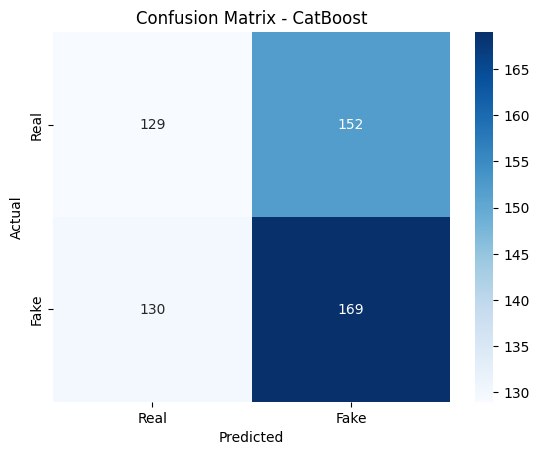

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from catboost import CatBoostClassifier
# Load your dataset
df = pd.read_csv("/content/FastText_Malayalam_Embeddings.csv")  # update path if needed
X = df.drop(columns=["Label"])
y = df["Label"].astype(int)

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Confusion matrix helper
def show_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Real", "Fake"], yticklabels=["Real", "Fake"])
    plt.title(f"Confusion Matrix - {title}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


model = CatBoostClassifier(verbose=0, random_state=42)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("🐱 CatBoost")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Train F1 Score:", f1_score(y_train, y_train_pred))
print("Test F1 Score:", f1_score(y_test, y_test_pred))

show_confusion_matrix(y_test, y_test_pred, "CatBoost")


PCA APPLIED

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.6 MB/s eta 0:00:00


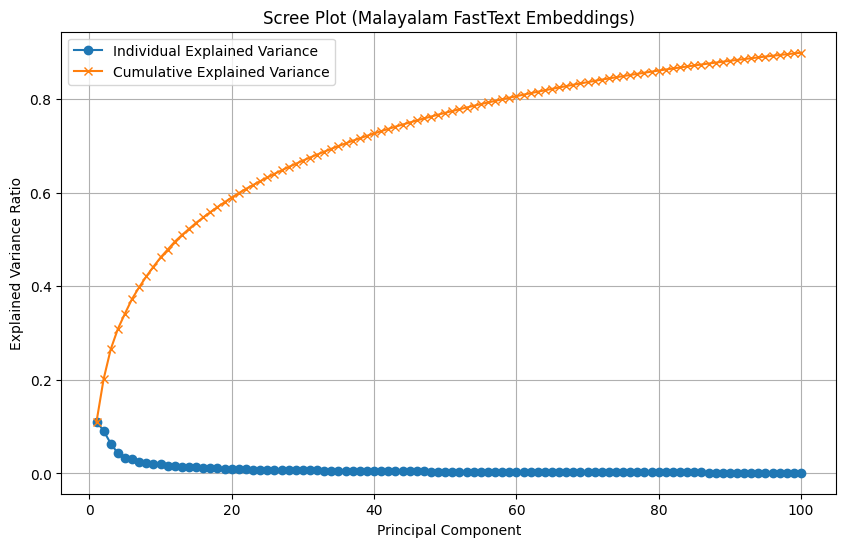

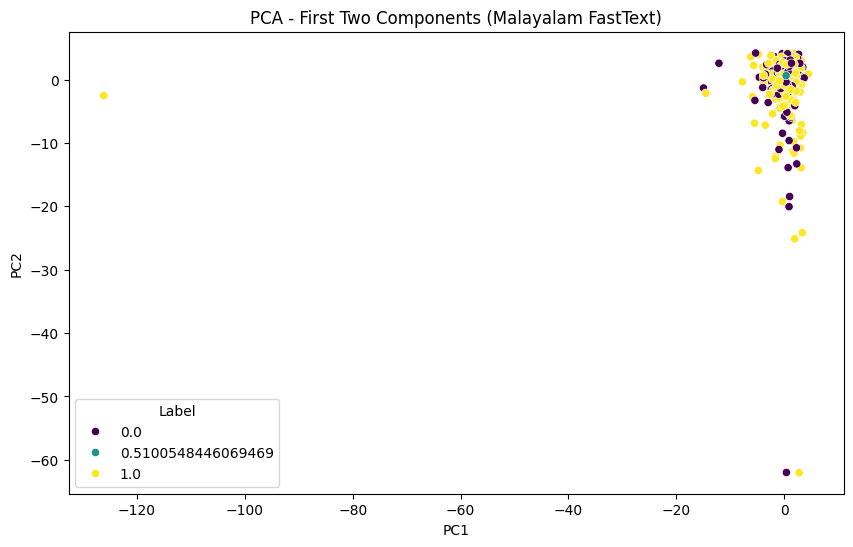

In [2]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# === Load dataset ===
file_path = "/content/FastText_Malayalam_Embeddings.csv"
df = pd.read_csv(file_path)

# === Handle NaNs by filling with mean ===
df.fillna(df.mean(numeric_only=True), inplace=True)

# === Features and Labels ===
X = df.drop(columns=['Label'])
y = df['Label']

# === Standardize Features ===
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# === Apply PCA (100 components) ===
pca = PCA(n_components=100)
X_pca = pca.fit_transform(X_scaled)

# === Explained Variance ===
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# === Scree Plot ===
plt.figure(figsize=(10, 6))
plt.plot(range(1, 101), explained_variance, marker='o', label='Individual Explained Variance')
plt.plot(range(1, 101), cumulative_variance, marker='x', label='Cumulative Explained Variance')
plt.title("Scree Plot (Malayalam FastText Embeddings)")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.legend()
plt.grid(True)
plt.savefig("malayalam_laser_scree_plot.png")
plt.show()

# === PCA 2D Scatter Plot ===
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='viridis')
plt.title("PCA - First Two Components (Malayalam FastText)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.savefig("malayalam_laser_pca_scatter.png")
plt.show()

# === Save PCA-transformed data ===
pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(100)])
pca_df['Label'] = y.values
pca_df.to_csv("LASER_Malayalam_PCA100.csv", index=False)

# === Save explained variance ===
pd.DataFrame({
    'Component': range(1, 101),
    'Explained Variance Ratio': explained_variance,
    'Cumulative Variance Ratio': cumulative_variance
}).to_csv("LASER_Malayalam_PCA_Variance.csv", index=False)


**RAKESH TESTING **

Random Forest

Initial dataset shape: (2465, 301)
NaN values in dataset: 182 total NaN values
NaN values in Label column: 1
Dataset shape after dropping NaN values: (2464, 301)
Data loading completed in 0.46 seconds
Number of components selected: 50
Explained variance ratio: 0.7118
PCA completed in 0.60 seconds
Fitting 3 folds for each of 20 candidates, totalling 60 fits

Best parameters: {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 3, 'n_estimators': 233}
Best cross-validation score: 0.563165905631659
Hyperparameter tuning completed in 101.82 seconds

Training Accuracy: 0.9061390157280568
Test Accuracy: 0.5172413793103449

Classification Report (Test Set):
              precision    recall  f1-score   support

         0.0       0.50      0.42      0.46       239
         1.0       0.53      0.61      0.57       254

    accuracy                           0.52       493
   macro avg       0.51      0.51      0.51       493
weighted avg       0.52      0.52   

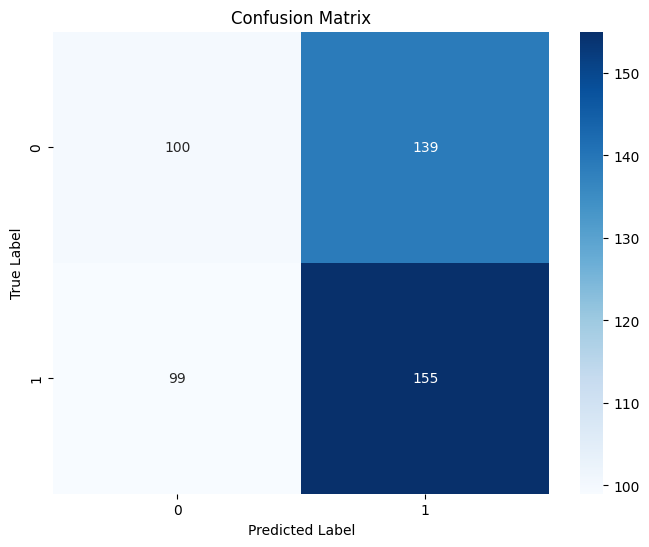

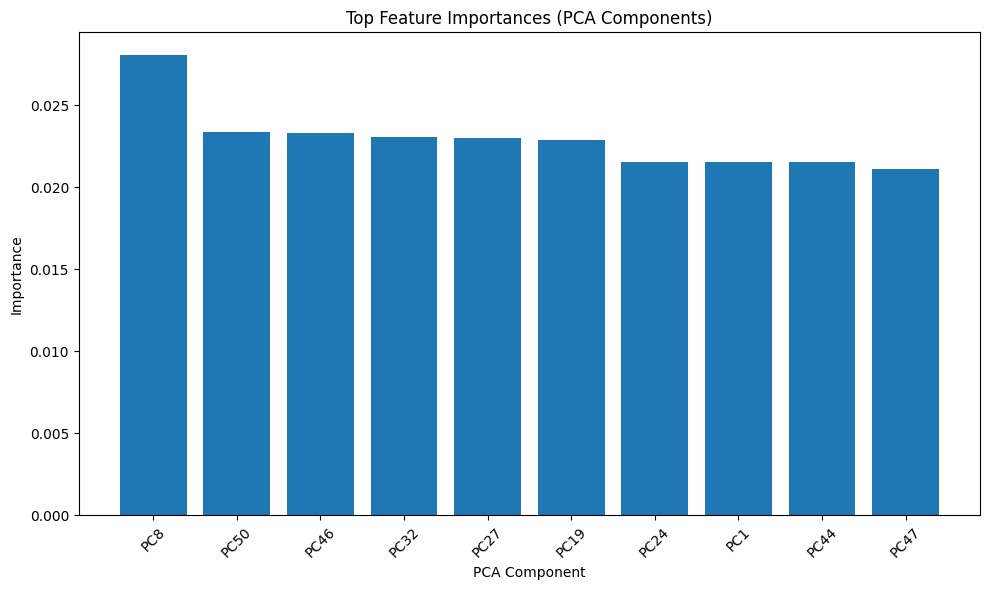

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import uuid
import time
from scipy.stats import randint, uniform

# Setting random seed for reproducibility
np.random.seed(42)

# Loading and cleaning the dataset
def load_data():
    start_time = time.time()
    df = pd.read_csv('/content/FastText_Malayalam_Embeddings.csv')

    # Checking for NaN values
    print(f"Initial dataset shape: {df.shape}")
    print(f"NaN values in dataset: {df.isna().sum().sum()} total NaN values")
    print(f"NaN values in Label column: {df['Label'].isna().sum()}")

    # Dropping rows with NaN values
    df_clean = df.dropna()
    print(f"Dataset shape after dropping NaN values: {df_clean.shape}")

    X = df_clean.drop('Label', axis=1)
    y = df_clean['Label']

    print(f"Data loading completed in {time.time() - start_time:.2f} seconds")
    return X, y

# Applying PCA for dimensionality reduction
def apply_pca(X_train, X_test, n_components=50):  # Fixed number of components for speed
    start_time = time.time()
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    explained_variance = np.sum(pca.explained_variance_ratio_)
    print(f"Number of components selected: {pca.n_components_}")
    print(f"Explained variance ratio: {explained_variance:.4f}")
    print(f"PCA completed in {time.time() - start_time:.2f} seconds")

    return X_train_pca, X_test_pca, pca

# Performing hyperparameter tuning for Random Forest
def tune_random_forest(X_train, y_train):
    start_time = time.time()
    rf = RandomForestClassifier(random_state=42, n_jobs=-1)  # Use all CPU cores

    # Reduced parameter grid for RandomizedSearchCV
    param_dist = {
        'n_estimators': randint(100, 300),  # Random integers between 100 and 300
        'max_depth': [10, 20, None],
        'min_samples_split': randint(2, 10),
        'min_samples_leaf': randint(1, 5),
        'max_features': ['sqrt', 'log2']
    }

    random_search = RandomizedSearchCV(
        estimator=rf,
        param_distributions=param_dist,
        n_iter=20,  # Number of parameter settings to sample
        cv=3,       # Reduced from 5 to 3 for speed
        n_jobs=-1,
        scoring='accuracy',
        verbose=1,
        random_state=42
    )

    random_search.fit(X_train, y_train)

    print("\nBest parameters:", random_search.best_params_)
    print("Best cross-validation score:", random_search.best_score_)
    print(f"Hyperparameter tuning completed in {time.time() - start_time:.2f} seconds")

    return random_search.best_estimator_

# Evaluating the model
def evaluate_model(model, X_train, X_test, y_train, y_test):
    start_time = time.time()
    # Training predictions
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)

    # Test predictions
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    print("\nTraining Accuracy:", train_accuracy)
    print("Test Accuracy:", test_accuracy)

    # Classification report
    print("\nClassification Report (Test Set):")
    print(classification_report(y_test, y_test_pred))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.savefig('confusion_matrix.png')

    print(f"Model evaluation completed in {time.time() - start_time:.2f} seconds")
    return train_accuracy, test_accuracy

# Visualizing feature importance
def plot_feature_importance(model, pca, n_features=10):
    start_time = time.time()
    # Getting feature importance from Random Forest
    importances = model.feature_importances_

    # Creating feature names based on PCA components
    feature_names = [f'PC{i+1}' for i in range(len(importances))]

    # Sorting features by importance
    indices = np.argsort(importances)[::-1][:n_features]

    plt.figure(figsize=(10, 6))
    plt.bar(range(n_features), importances[indices])
    plt.xticks(range(n_features), [feature_names[i] for i in indices], rotation=45)
    plt.title('Top Feature Importances (PCA Components)')
    plt.xlabel('PCA Component')
    plt.ylabel('Importance')
    plt.tight_layout()
    plt.savefig('feature_importance.png')

    print(f"Feature importance plotting completed in {time.time() - start_time:.2f} seconds")

# Main execution
def main():
    start_time = time.time()
    # Loading and cleaning data
    X, y = load_data()

    # Splitting data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # Applying PCA
    X_train_pca, X_test_pca, pca = apply_pca(X_train, X_test)

    # Tuning Random Forest
    best_rf = tune_random_forest(X_train_pca, y_train)

    # Evaluating model
    train_acc, test_acc = evaluate_model(best_rf, X_train_pca, X_test_pca, y_train, y_test)

    # Plotting feature importance
    plot_feature_importance(best_rf, pca)

    # Checking if accuracy meets requirement
    if test_acc >= 0.80:
        print("\nSuccess: Model achieved accuracy >= 80%")
    else:
        print("\nWarning: Model accuracy below 80%. Consider trying different parameters or models.")

    # Saving the model (optional)
    import joblib
    model_id = str(uuid.uuid4())
    joblib.dump(best_rf, f'rf_model_{model_id}.pkl')
    print(f"\nModel saved as rf_model_{model_id}.pkl")
    print(f"Total execution time: {time.time() - start_time:.2f} seconds")

if __name__ == "__main__":
    main()

XG BOOST

Initial dataset shape: (2900, 301)
NaN values in dataset: 0 total NaN values
NaN values in Label column: 0
Dataset shape after dropping NaN values: (2900, 301)
Data loading completed in 0.34 seconds
Number of components selected: 50
Explained variance ratio: 0.7097
PCA completed in 0.83 seconds
Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [01:48:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Best parameters: {'colsample_bytree': np.float64(0.662397808134481), 'learning_rate': np.float64(0.026844247528777843), 'max_depth': 7, 'min_child_weight': 4, 'n_estimators': 203, 'subsample': np.float64(0.8832290311184181)}
Best cross-validation score: 0.5271496111774098
Hyperparameter tuning completed in 70.85 seconds

Training Accuracy: 0.8862068965517241
Test Accuracy: 0.5172413793103449

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.50      0.46      0.48       280
           1       0.53      0.57      0.55       300

    accuracy                           0.52       580
   macro avg       0.52      0.52      0.51       580
weighted avg       0.52      0.52      0.52       580

Model evaluation completed in 0.32 seconds
Feature importance plotting completed in 0.18 seconds


Model saved as xgb_model_6ded85fa-69ac-4241-b26c-5e12a529c839.pkl
Total execution time: 72.53 seconds


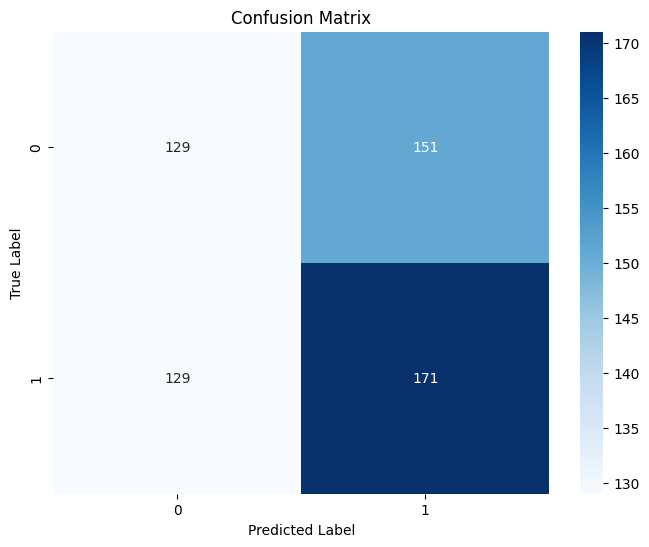

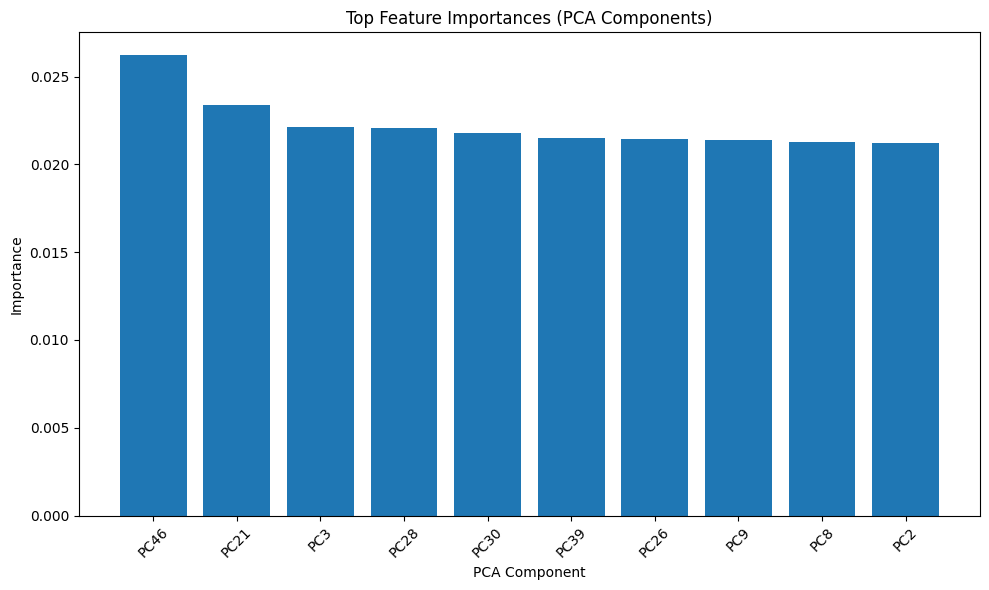

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import uuid
import time
from scipy.stats import randint, uniform

# Setting random seed for reproducibility
np.random.seed(42)

# Loading and cleaning the dataset
def load_data():
    start_time = time.time()
    df = pd.read_csv('/content/FastText_Malayalam_Embeddings.csv')

    # Checking for NaN values
    print(f"Initial dataset shape: {df.shape}")
    print(f"NaN values in dataset: {df.isna().sum().sum()} total NaN values")
    print(f"NaN values in Label column: {df['Label'].isna().sum()}")

    # Dropping rows with NaN values
    df_clean = df.dropna()
    print(f"Dataset shape after dropping NaN values: {df_clean.shape}")

    X = df_clean.drop('Label', axis=1)
    y = df_clean['Label']

    print(f"Data loading completed in {time.time() - start_time:.2f} seconds")
    return X, y

# Applying PCA for dimensionality reduction
def apply_pca(X_train, X_test, n_components=50):  # Fixed number of components for speed
    start_time = time.time()
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    explained_variance = np.sum(pca.explained_variance_ratio_)
    print(f"Number of components selected: {pca.n_components_}")
    print(f"Explained variance ratio: {explained_variance:.4f}")
    print(f"PCA completed in {time.time() - start_time:.2f} seconds")

    return X_train_pca, X_test_pca, pca

# Performing hyperparameter tuning for XGBoost
def tune_xgboost(X_train, y_train):
    start_time = time.time()
    xgb = XGBClassifier(random_state=42, n_jobs=-1, use_label_encoder=False, eval_metric='logloss')

    # Parameter distribution for RandomizedSearchCV
    param_dist = {
        'n_estimators': randint(100, 300),
        'max_depth': randint(3, 10),
        'learning_rate': uniform(0.01, 0.29),  # Range: 0.01 to 0.3
        'subsample': uniform(0.6, 0.4),        # Range: 0.6 to 1.0
        'colsample_bytree': uniform(0.6, 0.4), # Range: 0.6 to 1.0
        'min_child_weight': randint(1, 6)
    }

    random_search = RandomizedSearchCV(
        estimator=xgb,
        param_distributions=param_dist,
        n_iter=20,  # Number of parameter settings to sample
        cv=3,       # 3-fold CV for speed
        n_jobs=-1,
        scoring='accuracy',
        verbose=1,
        random_state=42
    )

    random_search.fit(X_train, y_train)

    print("\nBest parameters:", random_search.best_params_)
    print("Best cross-validation score:", random_search.best_score_)
    print(f"Hyperparameter tuning completed in {time.time() - start_time:.2f} seconds")

    return random_search.best_estimator_

# Evaluating the model
def evaluate_model(model, X_train, X_test, y_train, y_test):
    start_time = time.time()
    # Training predictions
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)

    # Test predictions
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    print("\nTraining Accuracy:", train_accuracy)
    print("Test Accuracy:", test_accuracy)

    # Classification report
    print("\nClassification Report (Test Set):")
    print(classification_report(y_test, y_test_pred))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.savefig('confusion_matrix_xgboost.png')

    print(f"Model evaluation completed in {time.time() - start_time:.2f} seconds")
    return train_accuracy, test_accuracy

# Visualizing feature importance
def plot_feature_importance(model, pca, n_features=10):
    start_time = time.time()
    # Getting feature importance from XGBoost
    importances = model.feature_importances_

    # Creating feature names based on PCA components
    feature_names = [f'PC{i+1}' for i in range(len(importances))]

    # Sorting features by importance
    indices = np.argsort(importances)[::-1][:n_features]

    plt.figure(figsize=(10, 6))
    plt.bar(range(n_features), importances[indices])
    plt.xticks(range(n_features), [feature_names[i] for i in indices], rotation=45)
    plt.title('Top Feature Importances (PCA Components)')
    plt.xlabel('PCA Component')
    plt.ylabel('Importance')
    plt.tight_layout()
    plt.savefig('feature_importance_xgboost.png')

    print(f"Feature importance plotting completed in {time.time() - start_time:.2f} seconds")

# Main execution
def main():
    start_time = time.time()
    # Loading and cleaning data
    X, y = load_data()

    # Splitting data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # Applying PCA
    X_train_pca, X_test_pca, pca = apply_pca(X_train, X_test)

    # Tuning XGBoost
    best_xgb = tune_xgboost(X_train_pca, y_train)

    # Evaluating model
    train_acc, test_acc = evaluate_model(best_xgb, X_train_pca, X_test_pca, y_train, y_test)

    # Plotting feature importance
    plot_feature_importance(best_xgb, pca)

    # Checking if accuracy meets requirement
    if test_acc >= 0.80:
        print("\nSuccess: Model achieved accuracy >= 80%")
    else:
        print("\nWarning: Model accuracy below 80%. Consider trying different parameters or models.")

    # Saving the model (optional)
    import joblib
    model_id = str(uuid.uuid4())
    joblib.dump(best_xgb, f'xgb_model_{model_id}.pkl')
    print(f"\nModel saved as xgb_model_{model_id}.pkl")
    print(f"Total execution time: {time.time() - start_time:.2f} seconds")

if __name__ == "__main__":
    main()

CatBoost

In [11]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.5 MB/s eta 0:00:00


Initial dataset shape: (2900, 1025)
NaN values in dataset: 0 total NaN values
NaN values in Label column: 0
Dataset shape after dropping NaN values: (2900, 1025)
Data loading completed in 1.25 seconds
Number of components selected: 50
Explained variance ratio: 0.4504
PCA completed in 1.94 seconds
Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(



Best parameters: {'bagging_temperature': np.float64(0.11586905952512971), 'depth': 4, 'iterations': 171, 'l2_leaf_reg': np.float64(5.045056067243831), 'learning_rate': np.float64(0.03766893378221928), 'subsample': np.float64(0.7483273008793065)}
Best cross-validation score: 0.5840500839598285
Hyperparameter tuning completed in 439.91 seconds

Training Accuracy: 0.6918103448275862
Test Accuracy: 0.5672413793103448

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.59      0.33      0.42       280
           1       0.56      0.79      0.65       300

    accuracy                           0.57       580
   macro avg       0.58      0.56      0.54       580
weighted avg       0.57      0.57      0.54       580

Model evaluation completed in 0.19 seconds
Feature importance plotting completed in 0.16 seconds


Model saved as catboost_model_90dceba8-bc60-49eb-8e44-714a312d2642.pkl
Total execution time: 443.50 seconds


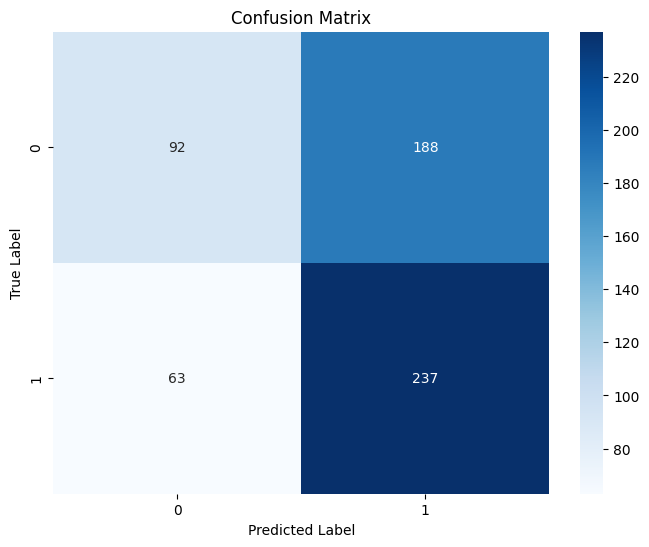

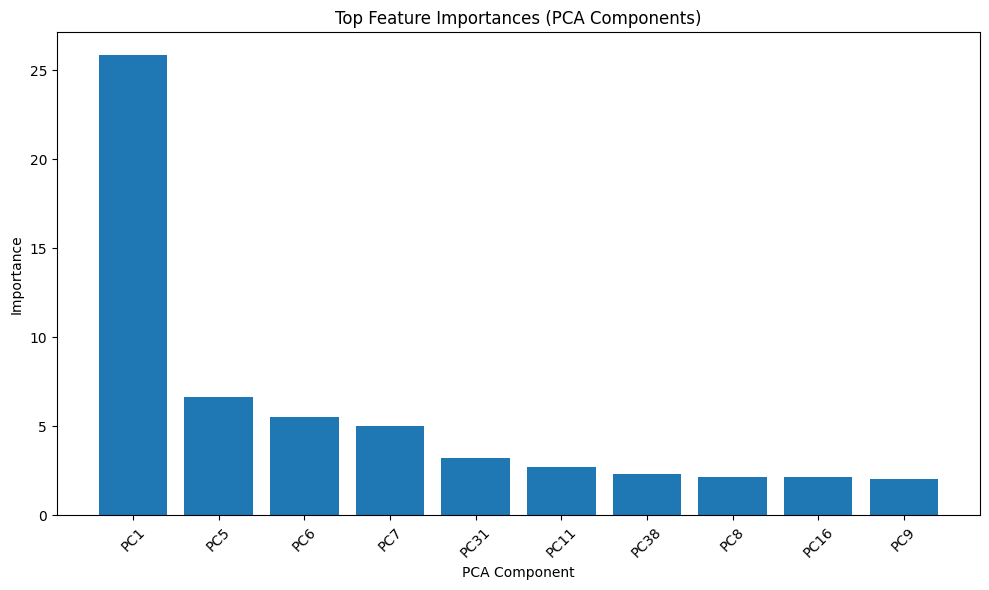

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from catboost import CatBoostClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import uuid
import time
from scipy.stats import randint, uniform

# Setting random seed for reproducibility
np.random.seed(42)

# Loading and cleaning the dataset
def load_data():
    start_time = time.time()
    df = pd.read_csv('/content/LASER_Malayalam_Embeddings.csv')

    # Checking for NaN values
    print(f"Initial dataset shape: {df.shape}")
    print(f"NaN values in dataset: {df.isna().sum().sum()} total NaN values")
    print(f"NaN values in Label column: {df['Label'].isna().sum()}")

    # Dropping rows with NaN values
    df_clean = df.dropna()
    print(f"Dataset shape after dropping NaN values: {df_clean.shape}")

    X = df_clean.drop('Label', axis=1)
    y = df_clean['Label']

    print(f"Data loading completed in {time.time() - start_time:.2f} seconds")
    return X, y

# Applying PCA for dimensionality reduction
def apply_pca(X_train, X_test, n_components=50):  # Fixed number of components for speed
    start_time = time.time()
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    explained_variance = np.sum(pca.explained_variance_ratio_)
    print(f"Number of components selected: {pca.n_components_}")
    print(f"Explained variance ratio: {explained_variance:.4f}")
    print(f"PCA completed in {time.time() - start_time:.2f} seconds")

    return X_train_pca, X_test_pca, pca

# Performing hyperparameter tuning for CatBoost
def tune_catboost(X_train, y_train):
    start_time = time.time()
    catboost = CatBoostClassifier(random_seed=42, thread_count=-1, verbose=0)  # Use all CPU cores, suppress verbose output

    # Parameter distribution for RandomizedSearchCV
    param_dist = {
        'iterations': randint(100, 300),          # Number of boosting iterations
        'depth': randint(4, 10),                  # Tree depth
        'learning_rate': uniform(0.01, 0.29),     # Range: 0.01 to 0.3
        'l2_leaf_reg': uniform(1, 9),             # L2 regularization, range: 1 to 10
        'bagging_temperature': uniform(0, 1),     # Controls intensity of Bayesian bagging
        'subsample': uniform(0.6, 0.4)            # Fraction of samples, range: 0.6 to 1.0
    }

    random_search = RandomizedSearchCV(
        estimator=catboost,
        param_distributions=param_dist,
        n_iter=20,  # Number of parameter settings to sample
        cv=3,       # 3-fold CV for speed
        n_jobs=-1,
        scoring='accuracy',
        verbose=1,
        random_state=42
    )

    random_search.fit(X_train, y_train)

    print("\nBest parameters:", random_search.best_params_)
    print("Best cross-validation score:", random_search.best_score_)
    print(f"Hyperparameter tuning completed in {time.time() - start_time:.2f} seconds")

    return random_search.best_estimator_

# Evaluating the model
def evaluate_model(model, X_train, X_test, y_train, y_test):
    start_time = time.time()
    # Training predictions
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)

    # Test predictions
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    print("\nTraining Accuracy:", train_accuracy)
    print("Test Accuracy:", test_accuracy)

    # Classification report
    print("\nClassification Report (Test Set):")
    print(classification_report(y_test, y_test_pred))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.savefig('confusion_matrix_catboost.png')

    print(f"Model evaluation completed in {time.time() - start_time:.2f} seconds")
    return train_accuracy, test_accuracy

# Visualizing feature importance
def plot_feature_importance(model, pca, n_features=10):
    start_time = time.time()
    # Getting feature importance from CatBoost
    importances = model.get_feature_importance()

    # Creating feature names based on PCA components
    feature_names = [f'PC{i+1}' for i in range(len(importances))]

    # Sorting features by importance
    indices = np.argsort(importances)[::-1][:n_features]

    plt.figure(figsize=(10, 6))
    plt.bar(range(n_features), importances[indices])
    plt.xticks(range(n_features), [feature_names[i] for i in indices], rotation=45)
    plt.title('Top Feature Importances (PCA Components)')
    plt.xlabel('PCA Component')
    plt.ylabel('Importance')
    plt.tight_layout()
    plt.savefig('feature_importance_catboost.png')

    print(f"Feature importance plotting completed in {time.time() - start_time:.2f} seconds")

# Main execution
def main():
    start_time = time.time()
    # Loading and cleaning data
    X, y = load_data()

    # Splitting data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # Applying PCA
    X_train_pca, X_test_pca, pca = apply_pca(X_train, X_test)

    # Tuning CatBoost
    best_catboost = tune_catboost(X_train_pca, y_train)

    # Evaluating model
    train_acc, test_acc = evaluate_model(best_catboost, X_train_pca, X_test_pca, y_train, y_test)

    # Plotting feature importance
    plot_feature_importance(best_catboost, pca)

    # Checking if accuracy meets requirement
    if test_acc >= 0.80:
        print("\nSuccess: Model achieved accuracy >= 80%")
    else:
        print("\nWarning: Model accuracy below 80%. Consider trying different parameters or models.")

    # Saving the model (optional)
    import joblib
    model_id = str(uuid.uuid4())
    joblib.dump(best_catboost, f'catboost_model_{model_id}.pkl')
    print(f"\nModel saved as catboost_model_{model_id}.pkl")
    print(f"Total execution time: {time.time() - start_time:.2f} seconds")

if __name__ == "__main__":
    main()

MLP

Initial dataset shape: (2900, 301)
NaN values in dataset: 0 total NaN values
NaN values in Label column: 0
Dataset shape after dropping NaN values: (2900, 301)
Data loading completed in 0.36 seconds
Number of components selected: 50
Explained variance ratio: 0.7097
PCA completed in 1.00 seconds
Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(



Best parameters: {'activation': 'relu', 'alpha': np.float64(0.00774522321603691), 'batch_size': 167, 'hidden_layer_sizes': (100, 50), 'learning_rate_init': np.float64(0.00023939024487933613), 'solver': 'adam'}
Best cross-validation score: 0.518525204105396
Hyperparameter tuning completed in 204.04 seconds

Training Accuracy: 0.8900862068965517
Test Accuracy: 0.5241379310344828

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.51      0.54      0.52       280
           1       0.54      0.51      0.53       300

    accuracy                           0.52       580
   macro avg       0.52      0.52      0.52       580
weighted avg       0.53      0.52      0.52       580

Model evaluation completed in 0.18 seconds


Model saved as mlp_model_c1d42f3a-fff9-4848-80de-23c199770bc2.pkl
Total execution time: 205.61 seconds


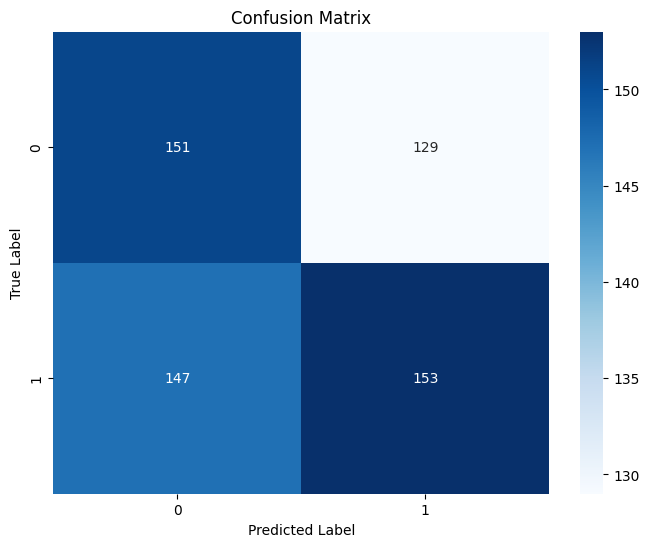

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import uuid
import time
from scipy.stats import randint, uniform

# Setting random seed for reproducibility
np.random.seed(42)

# Loading and cleaning the dataset
def load_data():
    start_time = time.time()
    df = pd.read_csv('/content/FastText_Malayalam_Embeddings.csv')

    # Checking for NaN values
    print(f"Initial dataset shape: {df.shape}")
    print(f"NaN values in dataset: {df.isna().sum().sum()} total NaN values")
    print(f"NaN values in Label column: {df['Label'].isna().sum()}")

    # Dropping rows with NaN values
    df_clean = df.dropna()
    print(f"Dataset shape after dropping NaN values: {df_clean.shape}")

    X = df_clean.drop('Label', axis=1)
    y = df_clean['Label']

    print(f"Data loading completed in {time.time() - start_time:.2f} seconds")
    return X, y

# Applying PCA for dimensionality reduction
def apply_pca(X_train, X_test, n_components=50):  # Fixed number of components for speed
    start_time = time.time()
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    explained_variance = np.sum(pca.explained_variance_ratio_)
    print(f"Number of components selected: {pca.n_components_}")
    print(f"Explained variance ratio: {explained_variance:.4f}")
    print(f"PCA completed in {time.time() - start_time:.2f} seconds")

    return X_train_pca, X_test_pca, pca

# Performing hyperparameter tuning for MLP
def tune_mlp(X_train, y_train):
    start_time = time.time()
    mlp = MLPClassifier(random_state=42, max_iter=500)  # Increased max_iter for convergence

    # Parameter distribution for RandomizedSearchCV
    param_dist = {
        'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],  # Different architectures
        'activation': ['relu', 'tanh'],                             # Activation functions
        'solver': ['adam', 'sgd'],                                 # Optimizers
        'learning_rate_init': uniform(0.0001, 0.0099),             # Range: 0.0001 to 0.01
        'alpha': uniform(0.0001, 0.0099),                         # L2 regularization, range: 0.0001 to 0.01
        'batch_size': randint(32, 256)                             # Batch size for training
    }

    random_search = RandomizedSearchCV(
        estimator=mlp,
        param_distributions=param_dist,
        n_iter=20,  # Number of parameter settings to sample
        cv=3,       # 3-fold CV for speed
        n_jobs=-1,  # Use all CPU cores
        scoring='accuracy',
        verbose=1,
        random_state=42
    )

    random_search.fit(X_train, y_train)

    print("\nBest parameters:", random_search.best_params_)
    print("Best cross-validation score:", random_search.best_score_)
    print(f"Hyperparameter tuning completed in {time.time() - start_time:.2f} seconds")

    return random_search.best_estimator_

# Evaluating the model
def evaluate_model(model, X_train, X_test, y_train, y_test):
    start_time = time.time()
    # Training predictions
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)

    # Test predictions
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    print("\nTraining Accuracy:", train_accuracy)
    print("Test Accuracy:", test_accuracy)

    # Classification report
    print("\nClassification Report (Test Set):")
    print(classification_report(y_test, y_test_pred))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.savefig('confusion_matrix_mlp.png')

    print(f"Model evaluation completed in {time.time() - start_time:.2f} seconds")
    return train_accuracy, test_accuracy

# Main execution
def main():
    start_time = time.time()
    # Loading and cleaning data
    X, y = load_data()

    # Splitting data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # Applying PCA
    X_train_pca, X_test_pca, pca = apply_pca(X_train, X_test)

    # Tuning MLP
    best_mlp = tune_mlp(X_train_pca, y_train)

    # Evaluating model
    train_acc, test_acc = evaluate_model(best_mlp, X_train_pca, X_test_pca, y_train, y_test)

    # Checking if accuracy meets requirement
    if test_acc >= 0.80:
        print("\nSuccess: Model achieved accuracy >= 80%")
    else:
        print("\nWarning: Model accuracy below 80%. Consider trying different parameters or models.")

    # Saving the model (optional)
    import joblib
    model_id = str(uuid.uuid4())
    joblib.dump(best_mlp, f'mlp_model_{model_id}.pkl')
    print(f"\nModel saved as mlp_model_{model_id}.pkl")
    print(f"Total execution time: {time.time() - start_time:.2f} seconds")

if __name__ == "__main__":
    main()

Ada Boost

Initial dataset shape: (2900, 301)
NaN values in dataset: 0 total NaN values
NaN values in Label column: 0
Dataset shape after dropping NaN values: (2900, 301)
Data loading completed in 0.91 seconds
Number of components selected: 50
Explained variance ratio: 0.7097
PCA completed in 0.65 seconds
Fitting 3 folds for each of 20 candidates, totalling 60 fits

Best parameters: {'estimator__max_depth': 1, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 8, 'learning_rate': np.float64(0.45583275285359115), 'n_estimators': 124}
Best cross-validation score: 0.5603429928921069
Hyperparameter tuning completed in 184.92 seconds

Training Accuracy: 0.6073275862068965
Test Accuracy: 0.506896551724138

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.49      0.43      0.46       280
           1       0.52      0.58      0.55       300

    accuracy                           0.51       580
   macro avg       0.50      0.50 

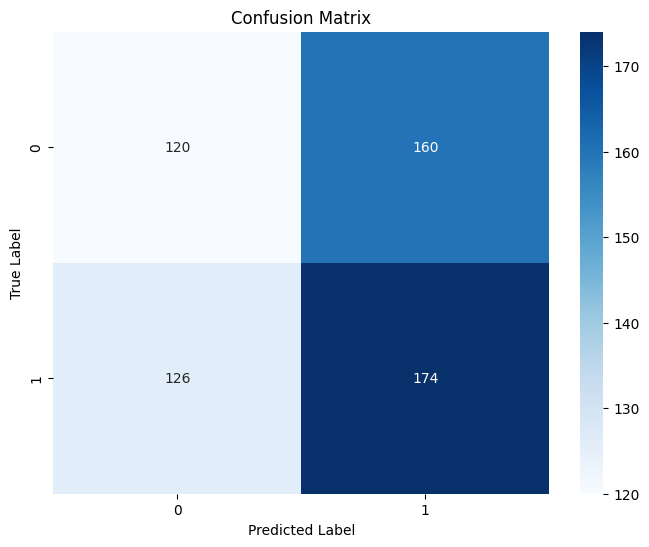

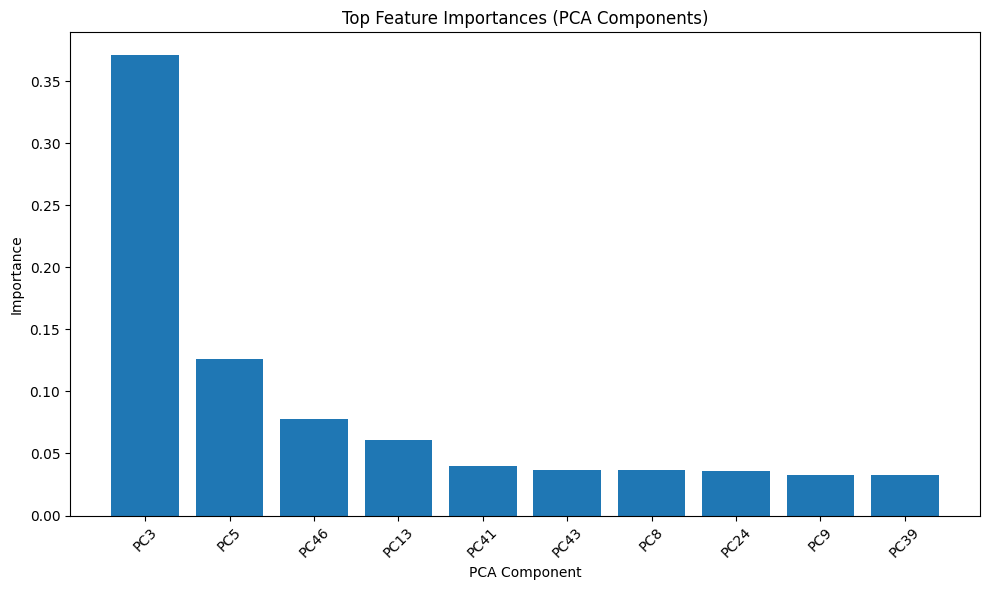

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import uuid
import time
from scipy.stats import randint, uniform

# Setting random seed for reproducibility
np.random.seed(42)

# Loading and cleaning the dataset
def load_data():
    start_time = time.time()
    df = pd.read_csv('/content/FastText_Malayalam_Embeddings.csv')

    # Checking for NaN values
    print(f"Initial dataset shape: {df.shape}")
    print(f"NaN values in dataset: {df.isna().sum().sum()} total NaN values")
    print(f"NaN values in Label column: {df['Label'].isna().sum()}")

    # Dropping rows with NaN values
    df_clean = df.dropna()
    print(f"Dataset shape after dropping NaN values: {df_clean.shape}")

    X = df_clean.drop('Label', axis=1)
    y = df_clean['Label']

    print(f"Data loading completed in {time.time() - start_time:.2f} seconds")
    return X, y

# Applying PCA for dimensionality reduction
def apply_pca(X_train, X_test, n_components=50):  # Fixed number of components for speed
    start_time = time.time()
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    explained_variance = np.sum(pca.explained_variance_ratio_)
    print(f"Number of components selected: {pca.n_components_}")
    print(f"Explained variance ratio: {explained_variance:.4f}")
    print(f"PCA completed in {time.time() - start_time:.2f} seconds")

    return X_train_pca, X_test_pca, pca

# Performing hyperparameter tuning for AdaBoost
def tune_adaboost(X_train, y_train):
    start_time = time.time()
    # Base estimator: Decision Tree with limited depth
    estimator = DecisionTreeClassifier(random_state=42)
    adaboost = AdaBoostClassifier(estimator=estimator, random_state=42)

    # Parameter distribution for RandomizedSearchCV
    param_dist = {
        'n_estimators': randint(50, 200),             # Number of weak learners
        'learning_rate': uniform(0.01, 1.0),          # Contribution of each classifier, range: 0.01 to 1.0
        'estimator__max_depth': randint(1, 5),        # Depth of base decision trees
        'estimator__min_samples_split': randint(2, 10),  # Min samples to split in base trees
        'estimator__min_samples_leaf': randint(1, 5)     # Min samples at leaf in base trees
    }

    random_search = RandomizedSearchCV(
        estimator=adaboost,
        param_distributions=param_dist,
        n_iter=20,  # Number of parameter settings to sample
        cv=3,       # 3-fold CV for speed
        n_jobs=-1,  # Use all CPU cores
        scoring='accuracy',
        verbose=1,
        random_state=42
    )

    random_search.fit(X_train, y_train)

    print("\nBest parameters:", random_search.best_params_)
    print("Best cross-validation score:", random_search.best_score_)
    print(f"Hyperparameter tuning completed in {time.time() - start_time:.2f} seconds")

    return random_search.best_estimator_

# Evaluating the model
def evaluate_model(model, X_train, X_test, y_train, y_test):
    start_time = time.time()
    # Training predictions
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)

    # Test predictions
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    print("\nTraining Accuracy:", train_accuracy)
    print("Test Accuracy:", test_accuracy)

    # Classification report
    print("\nClassification Report (Test Set):")
    print(classification_report(y_test, y_test_pred))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.savefig('confusion_matrix_adaboost.png')

    print(f"Model evaluation completed in {time.time() - start_time:.2f} seconds")
    return train_accuracy, test_accuracy

# Visualizing feature importance
def plot_feature_importance(model, pca, n_features=10):
    start_time = time.time()
    # Getting feature importance from AdaBoost
    importances = model.feature_importances_

    # Creating feature names based on PCA components
    feature_names = [f'PC{i+1}' for i in range(len(importances))]

    # Sorting features by importance
    indices = np.argsort(importances)[::-1][:n_features]

    plt.figure(figsize=(10, 6))
    plt.bar(range(n_features), importances[indices])
    plt.xticks(range(n_features), [feature_names[i] for i in indices], rotation=45)
    plt.title('Top Feature Importances (PCA Components)')
    plt.xlabel('PCA Component')
    plt.ylabel('Importance')
    plt.tight_layout()
    plt.savefig('feature_importance_adaboost.png')

    print(f"Feature importance plotting completed in {time.time() - start_time:.2f} seconds")

# Main execution
def main():
    start_time = time.time()
    # Loading and cleaning data
    X, y = load_data()

    # Splitting data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # Applying PCA
    X_train_pca, X_test_pca, pca = apply_pca(X_train, X_test)

    # Tuning AdaBoost
    best_adaboost = tune_adaboost(X_train_pca, y_train)

    # Evaluating model
    train_acc, test_acc = evaluate_model(best_adaboost, X_train_pca, X_test_pca, y_train, y_test)

    # Plotting feature importance
    plot_feature_importance(best_adaboost, pca)

    # Checking if accuracy meets requirement
    if test_acc >= 0.80:
        print("\nSuccess: Model achieved accuracy >= 80%")
    else:
        print("\nWarning: Model accuracy below 80%. Consider trying different parameters or models.")

    # Saving the model (optional)
    import joblib
    model_id = str(uuid.uuid4())
    joblib.dump(best_adaboost, f'adaboost_model_{model_id}.pkl')
    print(f"\nModel saved as adaboost_model_{model_id}.pkl")
    print(f"Total execution time: {time.time() - start_time:.2f} seconds")

if __name__ == "__main__":
    main()

Naive Bayes

Initial dataset shape: (2900, 301)
NaN values in dataset: 0 total NaN values
NaN values in Label column: 0
Dataset shape after dropping NaN values: (2900, 301)
Data loading completed in 0.40 seconds
Number of components selected: 50
Explained variance ratio: 0.7097
PCA completed in 0.37 seconds
Fitting 3 folds for each of 20 candidates, totalling 60 fits

Best parameters: {'var_smoothing': np.float64(0.004566054873446114)}
Best cross-validation score: 0.5219777525954006
Hyperparameter tuning completed in 5.17 seconds

Training Accuracy: 0.540948275862069
Test Accuracy: 0.4827586206896552

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.48      0.71      0.57       280
           1       0.50      0.27      0.35       300

    accuracy                           0.48       580
   macro avg       0.49      0.49      0.46       580
weighted avg       0.49      0.48      0.46       580

Model evaluation completed in 0.18 seconds


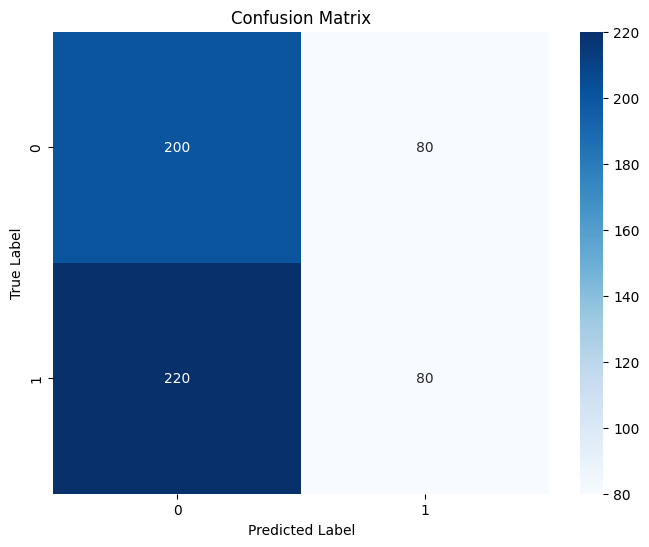

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import uuid
import time
from scipy.stats import loguniform

# Setting random seed for reproducibility
np.random.seed(42)

# Loading and cleaning the dataset
def load_data():
    start_time = time.time()
    df = pd.read_csv('/content/FastText_Malayalam_Embeddings.csv')

    # Checking for NaN values
    print(f"Initial dataset shape: {df.shape}")
    print(f"NaN values in dataset: {df.isna().sum().sum()} total NaN values")
    print(f"NaN values in Label column: {df['Label'].isna().sum()}")

    # Dropping rows with NaN values
    df_clean = df.dropna()
    print(f"Dataset shape after dropping NaN values: {df_clean.shape}")

    X = df_clean.drop('Label', axis=1)
    y = df_clean['Label']

    print(f"Data loading completed in {time.time() - start_time:.2f} seconds")
    return X, y

# Applying PCA for dimensionality reduction
def apply_pca(X_train, X_test, n_components=50):  # Fixed number of components for speed
    start_time = time.time()
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    explained_variance = np.sum(pca.explained_variance_ratio_)
    print(f"Number of components selected: {pca.n_components_}")
    print(f"Explained variance ratio: {explained_variance:.4f}")
    print(f"PCA completed in {time.time() - start_time:.2f} seconds")

    return X_train_pca, X_test_pca, pca

# Performing hyperparameter tuning for Naive Bayes
def tune_naive_bayes(X_train, y_train):
    start_time = time.time()
    nb = GaussianNB()

    # Parameter distribution for RandomizedSearchCV
    param_dist = {
        'var_smoothing': loguniform(1e-9, 1e-1)  # Smoothing parameter for GaussianNB
    }

    random_search = RandomizedSearchCV(
        estimator=nb,
        param_distributions=param_dist,
        n_iter=20,  # Number of parameter settings to sample
        cv=3,       # 3-fold CV for speed
        n_jobs=-1,  # Use all CPU cores
        scoring='accuracy',
        verbose=1,
        random_state=42
    )

    random_search.fit(X_train, y_train)

    print("\nBest parameters:", random_search.best_params_)
    print("Best cross-validation score:", random_search.best_score_)
    print(f"Hyperparameter tuning completed in {time.time() - start_time:.2f} seconds")

    return random_search.best_estimator_

# Evaluating the model
def evaluate_model(model, X_train, X_test, y_train, y_test):
    start_time = time.time()
    # Training predictions
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)

    # Test predictions
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    print("\nTraining Accuracy:", train_accuracy)
    print("Test Accuracy:", test_accuracy)

    # Classification report
    print("\nClassification Report (Test Set):")
    print(classification_report(y_test, y_test_pred))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.savefig('confusion_matrix_naive_bayes.png')

    print(f"Model evaluation completed in {time.time() - start_time:.2f} seconds")
    return train_accuracy, test_accuracy

# Main execution
def main():
    start_time = time.time()
    # Loading and cleaning data
    X, y = load_data()

    # Splitting data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # Applying PCA
    X_train_pca, X_test_pca, pca = apply_pca(X_train, X_test)

    # Tuning Naive Bayes
    best_nb = tune_naive_bayes(X_train_pca, y_train)

    # Evaluating model
    train_acc, test_acc = evaluate_model(best_nb, X_train_pca, X_test_pca, y_train, y_test)

    # Checking if accuracy meets requirement
    if test_acc >= 0.80:
        print("\nSuccess: Model achieved accuracy >= 80%")
    else:
        print("\nWarning: Model accuracy below 80%. Consider trying different parameters or models.")

    # Saving the model (optional)
    import joblib
    model_id = str(uuid.uuid4())
    joblib.dump(best_nb, f'naive_bayes_model_{model_id}.pkl')
    print(f"\nModel saved as naive_bayes_model_{model_id}.pkl")
    print(f"Total execution time: {time.time() - start_time:.2f} seconds")

if __name__ == "__main__":
    main()